# Air pollution
AIR POLLUTION refers to the release of pollutants into the air that is detrimental to human health and the planet as a whole. Today air pollution has been one of the significant problems to deal with for any nation.
Covid-19 pandemic has cost many lives. In this project let us see whta impact covid-19 has done on air quality of our country.
The dataset on which the analysis is done is taken from Central Pollution Control Board, Ministry of Environment (CPCB) website.
The data was called in R followed by some cleaning up and later stored into the database. 
Using spark SQL the data is retrieved back from the database and converted into pandas dataframe to perform the treatment and further analysis.

#### Briefing about gases:
##### NO2, NO, NOx - 
Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2). Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.
###### SO2 -
Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.
##### PM10, PM2.5 - 
Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful. Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5
##### Ammonia( NH3) - 
Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a byproduct of agriculture and industry.
##### Ozone(O3) - 
Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. 
##### Benzene, Toluene and Xylene (BTX) - 
Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry.
##### Carbon Monoxide(CO) -
Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

### Step 1: Calling the data from the database to spark
#### Some spark activities

In [1]:
# Importing a spark context
from pyspark import SparkContext
sc=SparkContext(appName="Blue_sky_analytics")

In [2]:
# Importing a spark session
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Pollution_effect_pre_post_covid").getOrCreate()

In [3]:
# Calling the data from the database
blue_sky_data = spark.read.format("jdbc").option(
    "url","jdbc:mysql://localhost:3306/Air_quality_db").option(
    "driver","com.mysql.jdbc.Driver").option("dbtable","city_data").option("user","root").option(
    "password","stephy123").load()

In [4]:
#To view the data
blue_sky_data.show(5)

+---------+----------+-----+----+----+-----+-----+----+----+-----+------+-------+-------+------+
|     City|      Date|PM2.5|PM10|  NO|  NO2|  NOx| NH3|  CO|  SO2|    O3|Benzene|Toluene|Xylene|
+---------+----------+-----+----+----+-----+-----+----+----+-----+------+-------+-------+------+
|Ahmedabad|01/01/2015| null|null|0.92|18.22|17.15|null|0.92|27.64|133.36|    0.0|   0.02|   0.0|
|Ahmedabad|02/01/2015| null|null|0.97|15.69|16.46|null|0.97|24.55| 34.06|   3.68|    5.5|  3.77|
|Ahmedabad|03/01/2015| null|null|17.4| 19.3| 29.7|null|17.4|29.07|  30.7|    6.8|   16.4|  2.25|
|Ahmedabad|04/01/2015| null|null| 1.7|18.48|17.97|null| 1.7|18.59| 36.08|   4.43|  10.14|   1.0|
|Ahmedabad|05/01/2015| null|null|22.1|21.42|37.76|null|22.1|39.33| 39.31|   7.01|  18.89|  2.78|
+---------+----------+-----+----+----+-----+-----+----+----+-----+------+-------+-------+------+
only showing top 5 rows



In [159]:
#Checking for the schema
blue_sky_data.printSchema()

root
 |-- City: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- PM2.5: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOx: double (nullable = true)
 |-- NH3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- Benzene: double (nullable = true)
 |-- Toluene: double (nullable = true)
 |-- Xylene: double (nullable = true)



In [5]:
#To perform sql queries, a view is created
blue_sky_data.createOrReplaceTempView("city_data")

In [6]:
#Creating and renaming coolumns
d = spark.sql("select * from city_data")
d = d.withColumnRenamed('PM2.5',"PM2_5")
d.show(10)

+---------+----------+-----+----+------+-----+------+----+------+-----+------+-------+-------+------+
|     City|      Date|PM2_5|PM10|    NO|  NO2|   NOx| NH3|    CO|  SO2|    O3|Benzene|Toluene|Xylene|
+---------+----------+-----+----+------+-----+------+----+------+-----+------+-------+-------+------+
|Ahmedabad|01/01/2015| null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|
|Ahmedabad|02/01/2015| null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|
|Ahmedabad|03/01/2015| null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|
|Ahmedabad|04/01/2015| null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|
|Ahmedabad|05/01/2015| null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|
|Ahmedabad|06/01/2015| null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 46.51|   5.42|  10.83|  1.93|
|Ahmedabad|07/01/2015| null|null|112.16|40.62|130.77|null|112.16|32.28| 33.47|    

In [7]:
#Checking the total no. of rows and distinct rows in the data
print("The total rows in the data is :",d.count())
print('Count of rows: {0}'.format(d.count()))
print('Count of distinct rows: {0}'.format(d.distinct().count()))

The total rows in the data is : 29531
Count of rows: 29531
Count of distinct rows: 29531


### Step 2: Converting to pandas and checking for missing values.

In [8]:
#Converting to pandas
pollution_data = d.toPandas()

In [2]:
pollution_data = pd.read_csv(r"C:\Users\STEPHY ABRAHAM\Downloads\city_day.csv\city_day.csv")

In [3]:
#Checking the information of the data
pollution_data['Date'] = pd.to_datetime(pollution_data['Date'])
pollution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     29531 non-null  object        
 1   Date     29531 non-null  datetime64[ns]
 2   PM2.5    24933 non-null  float64       
 3   PM10     18391 non-null  float64       
 4   NO       25949 non-null  float64       
 5   NO2      25946 non-null  float64       
 6   NOx      25346 non-null  float64       
 7   NH3      19203 non-null  float64       
 8   CO       27472 non-null  float64       
 9   SO2      25677 non-null  float64       
 10  O3       25509 non-null  float64       
 11  Benzene  23908 non-null  float64       
 12  Toluene  21490 non-null  float64       
 13  Xylene   11422 non-null  float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 3.0+ MB


In [165]:
#To check for the summary statistics of the data
pollution_data.describe()

PM2_5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene  
count  21490.000000  11422.000000  
mean       8.700972      3.070128  
std       19.969164      6.323247  
min        0.000000      0.000000  
25%        0.600000      0.140000  
50%        2.970000      0.980000  
75%        9.150000      3.350000  
max      454.850000    170.370000

In [166]:
#Total no. of states
cities = pollution_data['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Bengaluru', 'Delhi', 'Chennai', 'Mumbai', 'Lucknow', 'Ahmedabad',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')


In [4]:
#Data availabity from and to
print(f"The available data is between {pollution_data['Date'].min()} and {pollution_data['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-12-06 00:00:00


In [15]:
#A quick analysis using pandas profiling
import pandas_profiling
pollution_data.profile_report(title="City data")

### Step 3: Missing value treatment
For treating the missing values, missforest imputation is used. MissForest is another machine learning-based data imputation algorithm that operates on the Random Forest algorithm. First, the missing values are filled in using median/mode imputation. Then, we mark the missing values as ‘Predict’ and the others as training rows, which are fed into a Random Forest model trained to predict. The generated prediction for that row is then filled in to produce a transformed dataset. This process of looping through missing data points repeats several times, each iteration improving on better and better data. Iterations continue until some stopping criteria is met or after a certain number of iterations has elapsed. As a general rule, datasets become well imputed after four to five iterations.

In [5]:
#Combining benzene, toluene and Xylene
pollution_data['BTX'] = pollution_data['Benzene']+pollution_data['Toluene']+pollution_data['Xylene']
pollution_data = pollution_data.drop(['Benzene','Toluene','Xylene'],axis=1)
pollution_data

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad 2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad 2015-02-01    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad 2015-03-01    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad 2015-04-01    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad 2015-05-01    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam 2020-01-07  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3    BTX  
0       0.92  27.64  133.36   0.02  
1       0.97  24.55   34.06  12.95  
2      17.40  29.07   30.70  25.45  
3       1.70  18.59   36.08  15.57  
4      22.10  39.33   39.31  28.68  
...      ...    ...     ...    ...  
29526   0.47   8.55   23.30  15.04  
29527   0.52  12.72   30.14   3.33  
29528   0.48   8.42   30.96   0.02  
29529   0.52   9.84   28.30   0.00  
29530   0.59   2.10   17.05    NaN  

[29531 rows x 12 columns]

In [6]:
# Checking for misssing values before treatment
print(pollution_data.isna().sum())

City         0
Date         0
PM2.5     4598
PM10     11140
NO        3582
NO2       3585
NOx       4185
NH3      10328
CO        2059
SO2       3854
O3        4022
BTX      18114
dtype: int64


In [7]:
#dropping the City and Date variables to perform missforest
miss_data = pollution_data.drop(['City','Date'], axis = 1)
miss_data

PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3    BTX
0        NaN    NaN   0.92  18.22  17.15    NaN   0.92  27.64  133.36   0.02
1        NaN    NaN   0.97  15.69  16.46    NaN   0.97  24.55   34.06  12.95
2        NaN    NaN  17.40  19.30  29.70    NaN  17.40  29.07   30.70  25.45
3        NaN    NaN   1.70  18.48  17.97    NaN   1.70  18.59   36.08  15.57
4        NaN    NaN  22.10  21.42  37.76    NaN  22.10  39.33   39.31  28.68
...      ...    ...    ...    ...    ...    ...    ...    ...     ...    ...
29526  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30  15.04
29527  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   3.33
29528  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   0.02
29529  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   0.00
29530  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   17.05    NaN

[29531 rows x 10 columns]

In [8]:
#Libraries imported
from missingpy import MissForest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from IPython.display import display_html
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Time series analysis
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Applying missforest imputing method
imputer = MissForest()
X = imputer.fit_transform(miss_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [10]:
#Putting back to the dataframe
final_data= pd.DataFrame(X, columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','BTX'])
final_data['City'] = pollution_data['City']
final_data['Date'] = pollution_data['Date']
final_data=final_data[['Date','City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','BTX']]
final_data.head()

Date       City     PM2.5      PM10     NO    NO2    NOx      NH3  \
0 2015-01-01  Ahmedabad  119.5974  198.8628   0.92  18.22  17.15  17.0449   
1 2015-02-01  Ahmedabad  109.3131  198.8875   0.97  15.69  16.46  11.3893   
2 2015-03-01  Ahmedabad   92.6054  188.3340  17.40  19.30  29.70  15.5446   
3 2015-04-01  Ahmedabad   59.5626  116.9016   1.70  18.48  17.97   9.5779   
4 2015-05-01  Ahmedabad   79.7844  180.1871  22.10  21.42  37.76  24.8038   

      CO    SO2      O3    BTX  
0   0.92  27.64  133.36   0.02  
1   0.97  24.55   34.06  12.95  
2  17.40  29.07   30.70  25.45  
3   1.70  18.59   36.08  15.57  
4  22.10  39.33   39.31  28.68

In [11]:
# Checking for misssing values after treatment
print(final_data.isna().sum())

Date     0
City     0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
BTX      0
dtype: int64


In [18]:
# Convert string to datetime64
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    29531 non-null  datetime64[ns]
 1   City    29531 non-null  object        
 2   PM2.5   29531 non-null  float64       
 3   PM10    29531 non-null  float64       
 4   NO      29531 non-null  float64       
 5   NO2     29531 non-null  float64       
 6   NOx     29531 non-null  float64       
 7   NH3     29531 non-null  float64       
 8   CO      29531 non-null  float64       
 9   SO2     29531 non-null  float64       
 10  O3      29531 non-null  float64       
 11  BTX     29531 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 2.6+ MB


### Step 4: Air Quality Index (AQI)
An air quality index (AQI) is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises.

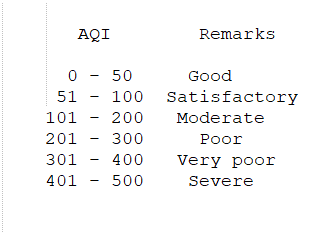


#### Calculating sub-index

In [12]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

final_data["PM10_SubIndex"] = final_data["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

final_data["PM2.5_SubIndex"] = final_data["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

final_data["SO2_SubIndex"] = final_data["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

final_data["NOx_SubIndex"] = final_data["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

final_data["NH3_SubIndex"] = final_data["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

final_data["CO_SubIndex"] = final_data["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

final_data["O3_SubIndex"] = final_data["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

#### Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [13]:
final_data["AQI"] = round(final_data[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
final_data.head()

Date       City     PM2.5      PM10     NO    NO2    NOx      NH3  \
0 2015-01-01  Ahmedabad  119.5974  198.8628   0.92  18.22  17.15  17.0449   
1 2015-02-01  Ahmedabad  109.3131  198.8875   0.97  15.69  16.46  11.3893   
2 2015-03-01  Ahmedabad   92.6054  188.3340  17.40  19.30  29.70  15.5446   
3 2015-04-01  Ahmedabad   59.5626  116.9016   1.70  18.48  17.97   9.5779   
4 2015-05-01  Ahmedabad   79.7844  180.1871  22.10  21.42  37.76  24.8038   

      CO    SO2      O3    BTX  PM10_SubIndex  PM2.5_SubIndex  SO2_SubIndex  \
0   0.92  27.64  133.36   0.02     165.333333      296.666667         33.75   
1   0.97  24.55   34.06  12.95     165.333333      263.333333         30.00   
2  17.40  29.07   30.70  25.45     158.666667      206.666667         36.25   
3   1.70  18.59   36.08  15.57     110.666667       98.333333         22.50   
4  22.10  39.33   39.31  28.68     153.333333      163.333333         48.75   

   NOx_SubIndex  NH3_SubIndex  CO_SubIndex  O3_SubIndex    AQI  
0         21.25          4.25     0.000000   148.529412  297.0  
1         20.00          2.75     0.000000    34.000000  263.0  
2         36.25          3.75   300.000000    30.000000  300.0  
3         21.25          2.25    50.000000    36.000000  111.0  
4         46.25          6.00   329.411765    39.000000  329.0

#### Filling the AQI bucket

In [14]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
final_data["AQI_Bucket"] = final_data["AQI"].apply(lambda x: get_AQI_bucket(x))
final_data.head()

Date       City     PM2.5      PM10     NO    NO2    NOx      NH3  \
0 2015-01-01  Ahmedabad  119.5974  198.8628   0.92  18.22  17.15  17.0449   
1 2015-02-01  Ahmedabad  109.3131  198.8875   0.97  15.69  16.46  11.3893   
2 2015-03-01  Ahmedabad   92.6054  188.3340  17.40  19.30  29.70  15.5446   
3 2015-04-01  Ahmedabad   59.5626  116.9016   1.70  18.48  17.97   9.5779   
4 2015-05-01  Ahmedabad   79.7844  180.1871  22.10  21.42  37.76  24.8038   

      CO    SO2  ...    BTX  PM10_SubIndex  PM2.5_SubIndex  SO2_SubIndex  \
0   0.92  27.64  ...   0.02     165.333333      296.666667         33.75   
1   0.97  24.55  ...  12.95     165.333333      263.333333         30.00   
2  17.40  29.07  ...  25.45     158.666667      206.666667         36.25   
3   1.70  18.59  ...  15.57     110.666667       98.333333         22.50   
4  22.10  39.33  ...  28.68     153.333333      163.333333         48.75   

   NOx_SubIndex  NH3_SubIndex  CO_SubIndex  O3_SubIndex    AQI  AQI_Bucket  
0         21.25          4.25     0.000000   148.529412  297.0        Poor  
1         20.00          2.75     0.000000    34.000000  263.0        Poor  
2         36.25          3.75   300.000000    30.000000  300.0        Poor  
3         21.25          2.25    50.000000    36.000000  111.0    Moderate  
4         46.25          6.00   329.411765    39.000000  329.0   Very Poor  

[5 rows x 21 columns]

In [15]:
#Removing the unwanted columns from the dataframe
final_data = final_data.drop(['PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'], axis = 1)
final_data.head()

Date       City     PM2.5      PM10     NO    NO2    NOx      NH3  \
0 2015-01-01  Ahmedabad  119.5974  198.8628   0.92  18.22  17.15  17.0449   
1 2015-02-01  Ahmedabad  109.3131  198.8875   0.97  15.69  16.46  11.3893   
2 2015-03-01  Ahmedabad   92.6054  188.3340  17.40  19.30  29.70  15.5446   
3 2015-04-01  Ahmedabad   59.5626  116.9016   1.70  18.48  17.97   9.5779   
4 2015-05-01  Ahmedabad   79.7844  180.1871  22.10  21.42  37.76  24.8038   

      CO    SO2      O3    BTX    AQI AQI_Bucket  
0   0.92  27.64  133.36   0.02  297.0       Poor  
1   0.97  24.55   34.06  12.95  263.0       Poor  
2  17.40  29.07   30.70  25.45  300.0       Poor  
3   1.70  18.59   36.08  15.57  111.0   Moderate  
4  22.10  39.33   39.31  28.68  329.0  Very Poor

The idea is to understand through data, whether NO2 and SO2 have a role in particulate formation or not?

Clearly there is some interdependence between SO2 and NO2, but no clear trend can be seen for pm2_5. Although, making fair asumptions would be premature as there were large number of missing values for pm2_5 as seen earlier.

## Step 5: Visualizations
#### 1. distplot() - represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

In [ ]:
fig, axarr = plt.subplots(5, 2, figsize=(12, 17))
sns.distplot(final_data['NO2'],hist=True,kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][0])

sns.distplot(final_data['SO2'],hist=True,kde=True,
             color='red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][1])

sns.distplot(final_data['NH3'],hist=True,kde=True,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][0])

sns.distplot(final_data['O3'],hist=True,kde=True,
             color='black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][1])

sns.distplot(final_data['PM2.5'],hist=True,kde=True,
             color='yellow',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[2][0])

sns.distplot(final_data['PM10'],hist=True,kde=True,
             color='orange',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[2][1])

sns.distplot(final_data['NO'],hist=True,kde=True,
             color='pink',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[3][0])

sns.distplot(final_data['NOx'],hist=True,kde=True,
             color='blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[3][1])

sns.distplot(final_data['NOx'],hist=True,kde=True,
             color='brown',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[4][0])

sns.distplot(final_data['CO'],hist=True,kde=True,
             color='grey',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[4][1])

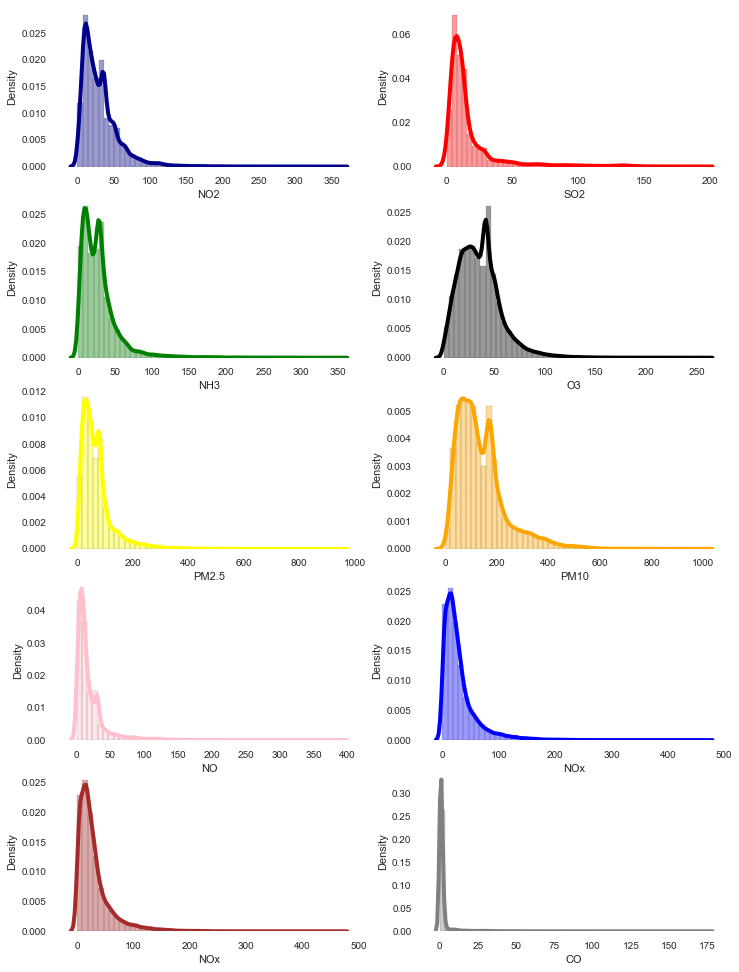

The graphs show the distribution of the range of values in each gases.

#### 2. Trend plot and Boxplot

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()
    


In [ ]:
final_data.reset_index(inplace=True)
df = final_data.copy()
value='NO2'
trend_plot(df,value)

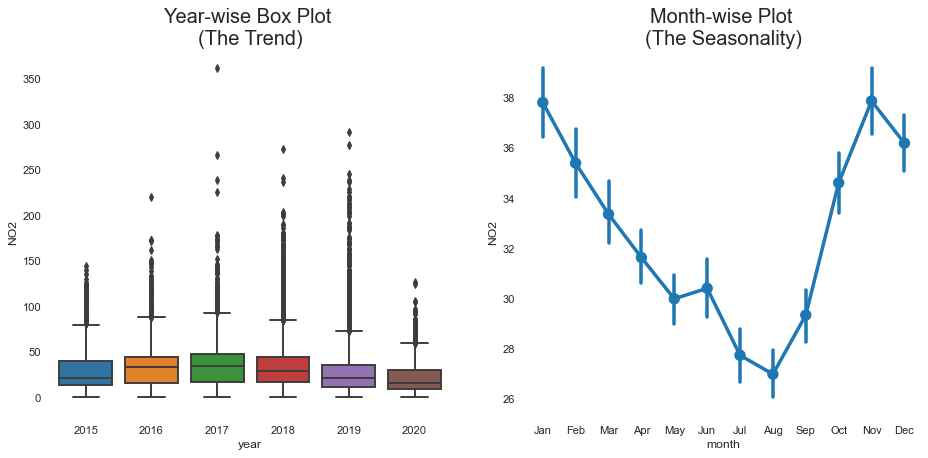

In [ ]:
value='O3'
trend_plot(df,value)

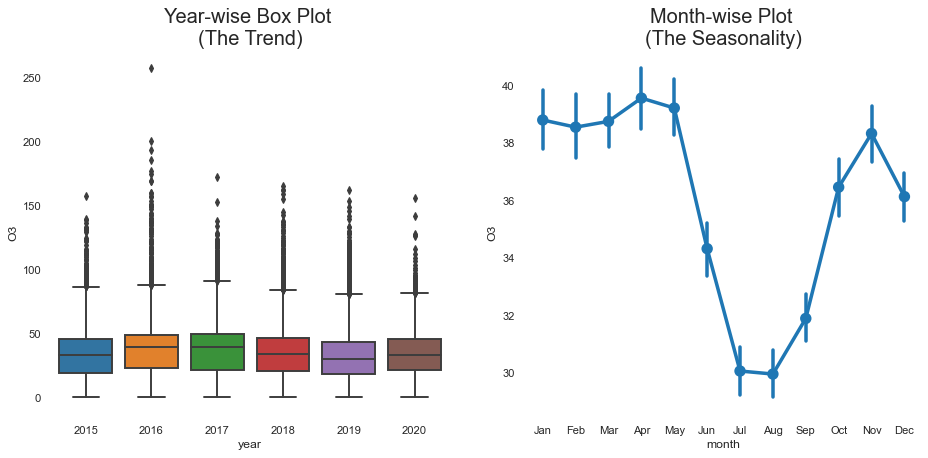

In [ ]:
value='SO2'
trend_plot(df,value)

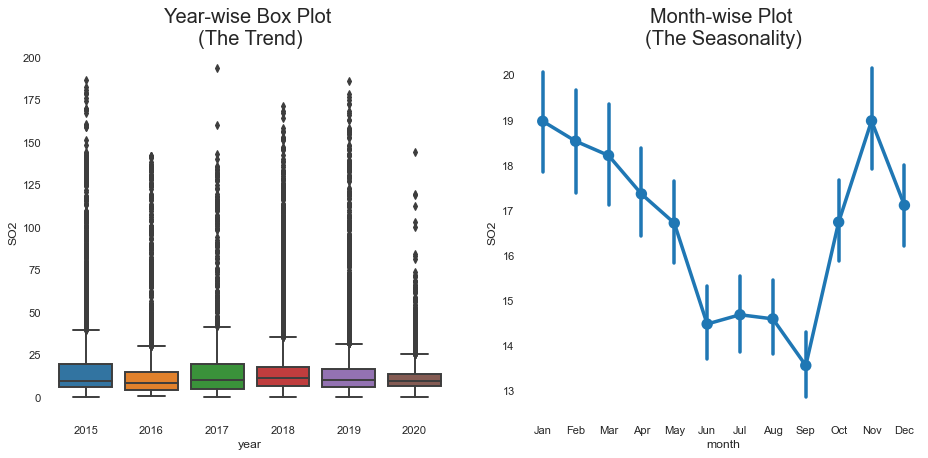

In [ ]:
value='BTX'
trend_plot(df,value)

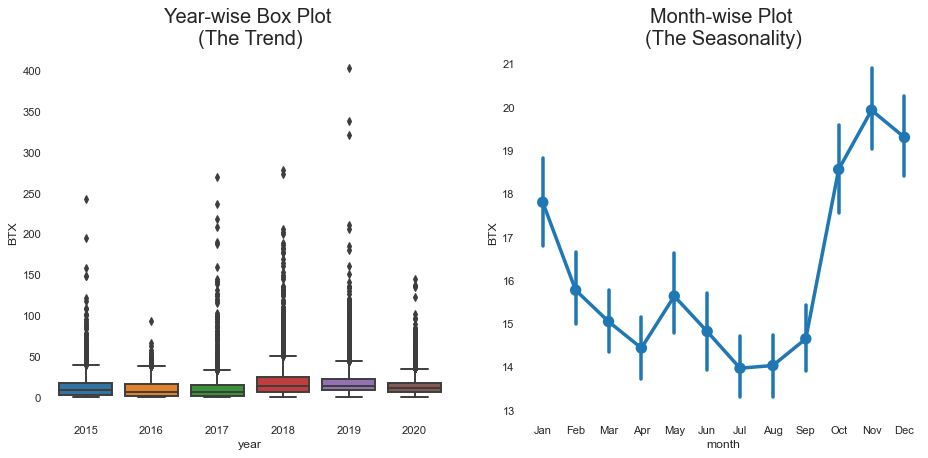

1. There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon season sets in during these months.The BTX (Benzene, Toluene, Xylene) levels additionally show a major decline around April.
2. The pollution level then start rising and reach highest levels in winters. It is during these months that a lot of crop residue burning takes place,especially in northern parts of India.
3. SO2 level has started increasing after 2017, although it had also seen a  sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.
4. The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately due to lockdown.

#### 3. corr() - To find the correlation between gases (heatmap)

In [ ]:
pol_data_corr = final_data.drop(['AQI', 'AQI_Bucket'], axis = 1)
plt.figure(figsize=(12,10))
sns.heatmap(pol_data_corr.corr(),cmap='coolwarm',annot=True);

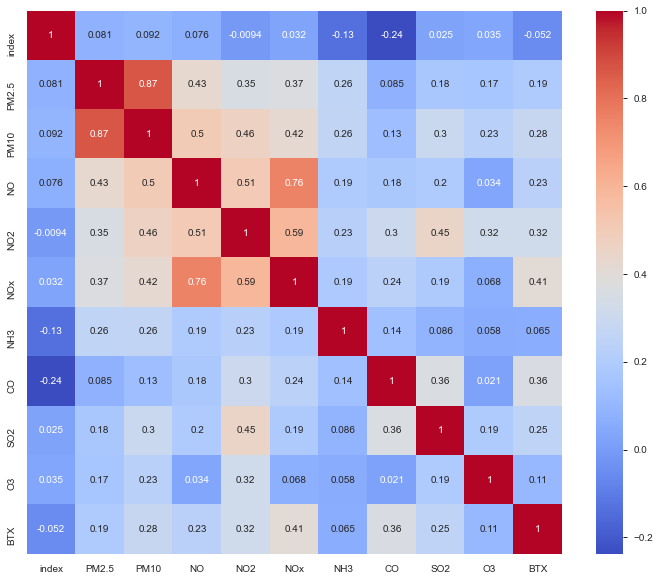

Using the plot, we can identify the highest and the lowest correlated gases.
Gases PM10 and PM2.5 are highly correlated with a value of 0.87.
Whereas, gases CO and O3 are the least correlated with the value of 0.029

#### 4. area() - displays graphically quantitative data
Here we check for the gases and its emmission in every state.

In [ ]:
statewise_emmissions = final_data.groupby('City').mean()[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'BTX']]
statewise_emmissions.plot.area(figsize=(20, 10))

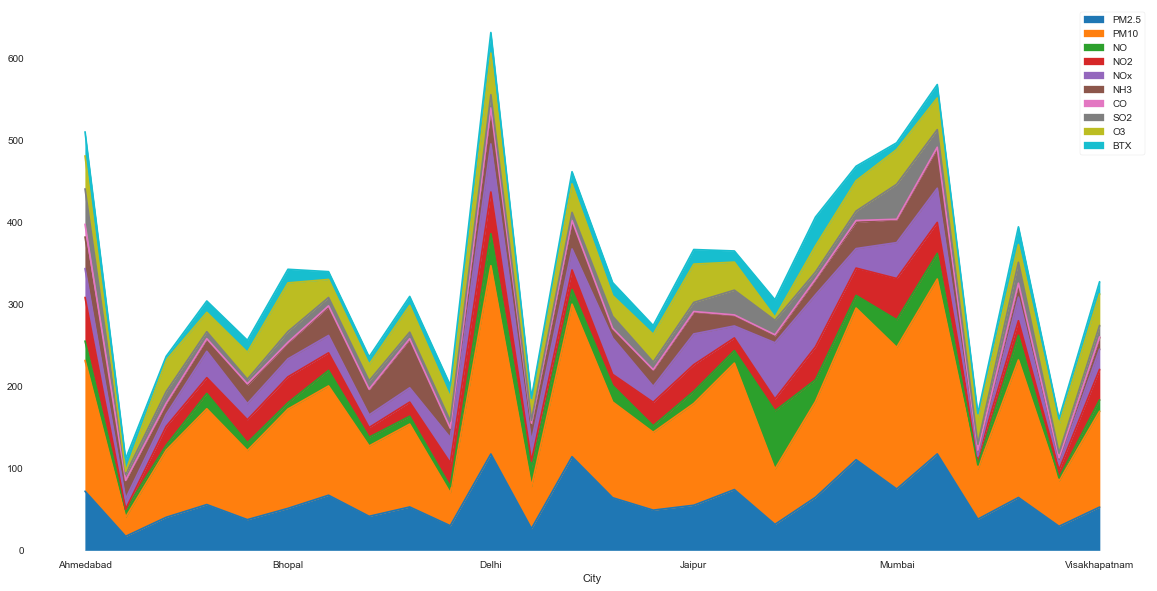

An area chart combines the line chart and bar chart. It shows how a numerical variable changes in the form of an area.

#### 5. Let's check for the top 10 states with highest NO2, SO2, NH3, CO, O3

In [31]:
Top10States_with_highest_No2=statewise_emmissions.sort_values(by='NO2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['NO2']]
print(Top10States_with_highest_No2_sorted.head(10))

Top10States_with_highest_So2=statewise_emmissions.sort_values(by='SO2',ascending=False).head(10)
Top10States_with_highest_So2_sorted=Top10States_with_highest_So2.loc[:,['SO2']]
print("---------------------------\n",Top10States_with_highest_So2_sorted.head(10))

Top10States_with_highest_NH3=statewise_emmissions.sort_values(by='NH3',ascending=False).head(10)
Top10States_with_highest_NH3_sorted=Top10States_with_highest_NH3.loc[:,['NH3']]
print("---------------------------\n",Top10States_with_highest_NH3_sorted.head(10))

Top10States_with_highest_CO=statewise_emmissions.sort_values(by='CO',ascending=False).head(10)
Top10States_with_highest_CO_sorted=Top10States_with_highest_CO.loc[:,['CO']]
print("---------------------------\n",Top10States_with_highest_CO_sorted.head(10))

Top10States_with_highest_O3=statewise_emmissions.sort_values(by='O3',ascending=False).head(10)
Top10States_with_highest_O3_sorted=Top10States_with_highest_O3.loc[:,['O3']]
print("---------------------------\n",Top10States_with_highest_O3_sorted.head(10))

                     NO2
City                    
Ahmedabad      53.149265
Delhi          50.774434
Mumbai         50.270987
Kolkata        40.106629
Patna          37.674621
Visakhapatnam  37.076435
Lucknow        33.270956
Jaipur         32.453334
Bhopal         31.489536
Coimbatore     28.746572
---------------------------
                      SO2
City                    
Ahmedabad      43.117181
Mumbai         42.592135
Jorapokhar     30.137356
Talcher        25.468965
Patna          21.403510
Kochi          17.595988
Delhi          15.958804
Guwahati       14.659256
Amaravati      14.088906
Visakhapatnam  13.901766
---------------------------
                     NH3
City                   
Chennai       58.753509
Patna         48.518978
Delhi         41.995894
Ahmedabad     38.483662
Brajrajnagar  34.523308
Gurugram      33.373696
Lucknow       32.093796
Chandigarh    30.719743
Mumbai        27.873667
Jaipur        26.523175
---------------------------
                      CO
C

##### Inference
NO2 - Delhi (50.797826) 

SO2 - Ahmedabad (45.597898)

NH3 - Chennai (58.443585)

CO - Ahemeabad (15.502330)

O3 - Bhopal (59.016719)

#### 6. Comparison of AQI levels

In [32]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = final_data[final_data['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

Date       City    AQI AQI_Bucket
1461 2019-01-01  Ahmedabad  571.0     Severe
1462 2019-02-01  Ahmedabad  547.0     Severe
1463 2019-03-01  Ahmedabad  900.0     Severe
1464 2019-04-01  Ahmedabad  535.0     Severe
1465 2019-05-01  Ahmedabad  571.0     Severe

In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)

fig = make_subplots(
    rows=6, cols=1,
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

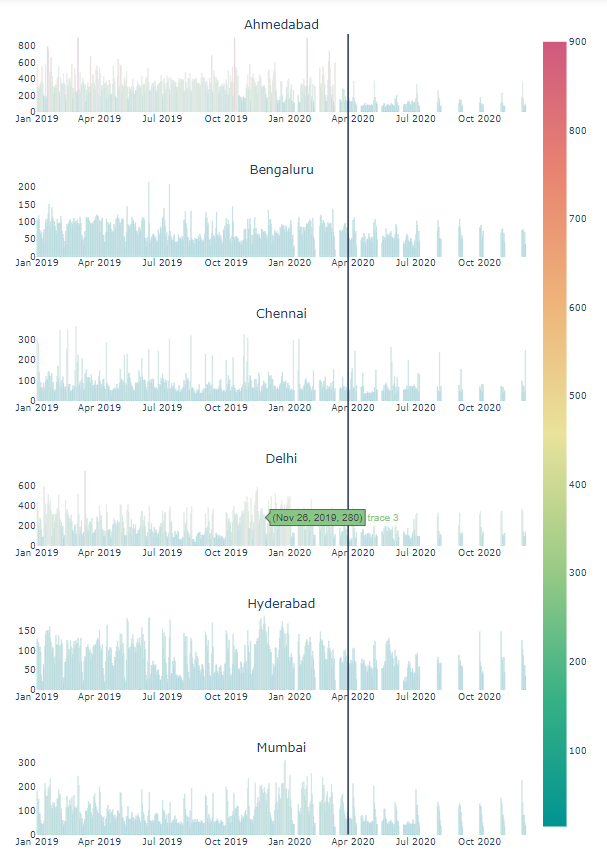

The black vertical line shows the date on which the first phase of lockdown came into effect.
It shows variation of gases from 2019. All the above Indian cities seem to be a dangerously polluted.
As we can se a clear decline can be observed from march mid 2020 onwards as the effect of lockdown.

#### 7. To check for AQI levels in different cities.

In [34]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-15']
AQI_afterLockdown = AQI_pivot['2020-03-16':'2020-06-01']
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad    285.241379
Bengaluru     81.155172
Chennai       80.724138
Delhi        226.224138
Hyderabad     91.206897
Mumbai       135.551724
dtype: float64
City
Ahmedabad    113.848485
Bengaluru     61.151515
Chennai       67.878788
Delhi        137.393939
Hyderabad     74.712121
Mumbai        73.833333
dtype: float64


In [35]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [36]:
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
  
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)


"Ahmedabad's AQI levels"

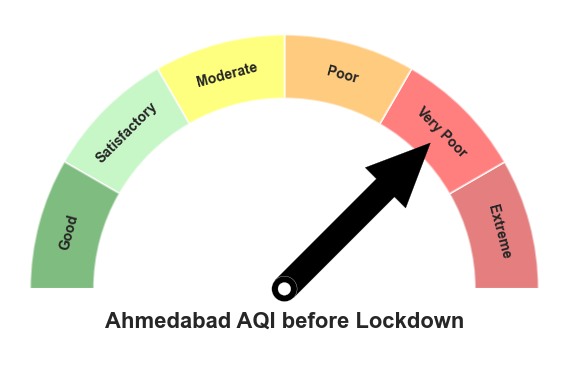

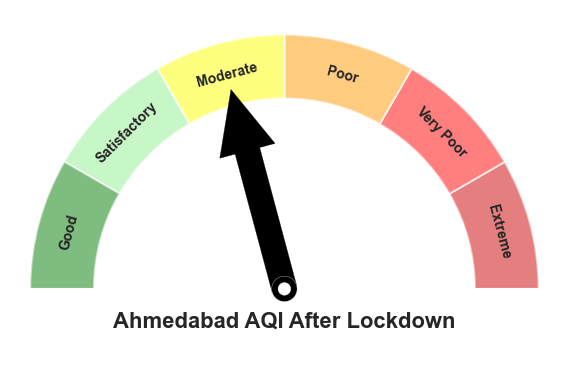

In [37]:
display("Ahmedabad's AQI levels")
gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI After Lockdown') 

"Delhi's AQI levels"

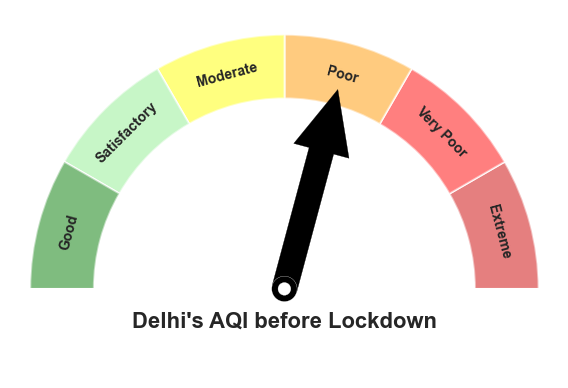

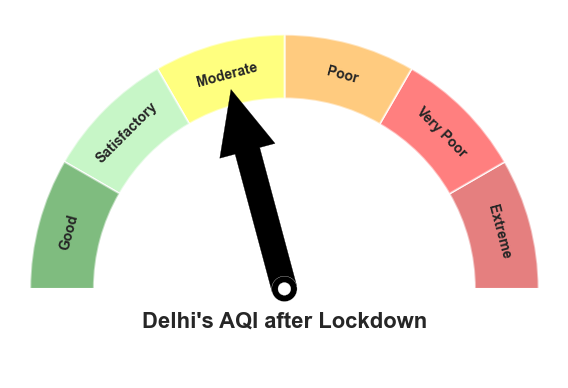

In [38]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI after Lockdown") 

"Bengaluru's AQI levels"

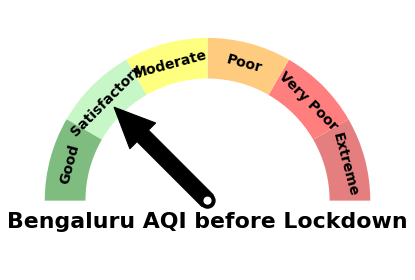

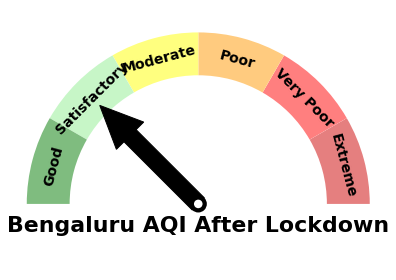

In [116]:
display("Bengaluru's AQI levels")
gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=2, title='Bengaluru AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=2, title='Bengaluru AQI After Lockdown') 

"Mumbai's AQI levels"

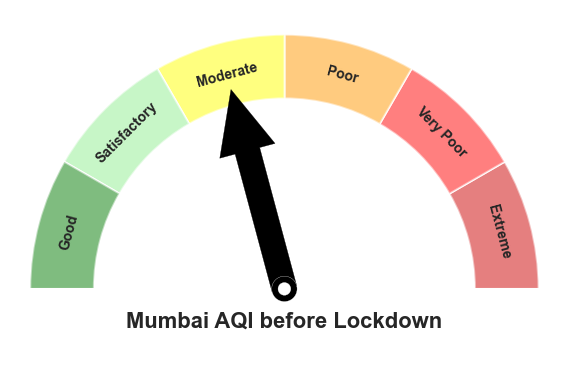

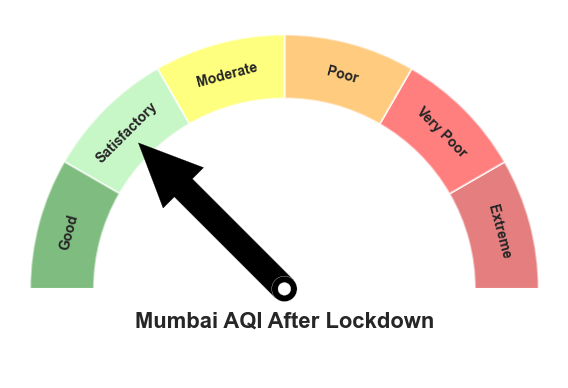

In [39]:
display("Mumbai's AQI levels")
gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Mumbai AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=2, title='Mumbai AQI After Lockdown') 

We can clearly see the effect of lockdown in different parts of India as AQI level decreases during the lockdown months.

#### 8. Pollution levels in different cities

In [40]:
def max_polluted_city(pollutant):
    x1 = final_data[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
o3 = max_polluted_city('O3')
btx = max_polluted_city('BTX')
NO = max_polluted_city('NO')
NH3 = max_polluted_city('NH3')
nox = max_polluted_city('NOx')
co = max_polluted_city('CO')

display_side_by_side(pm2_5,pm10,no2,so2,o3,btx,NO,NH3,nox,co)

City PM2.5 
 
 0 
 Patna 
 117.240000 
 
 
 1 
 Delhi 
 117.140000 
 
 
 2 
 Gurugram 
 113.880000 
 
 
 3 
 Lucknow 
 110.220000 
 
 
 4 
 Mumbai 
 74.530000 
 
 
 5 
 Jorapokhar 
 73.840000 
 
 
 6 
 Ahmedabad 
 71.840000 
 
 
 7 
 Brajrajnagar 
 66.960000 
 
 
 8 
 Kolkata 
 64.440000 
 
 
 9 
 Talcher 
 64.170000 
 
 City PM10 
 
 0 
 Delhi 
 229.300000 
 
 
 1 
 Patna 
 212.970000 
 
 
 2 
 Gurugram 
 185.690000 
 
 
 3 
 Lucknow 
 184.660000 
 
 
 4 
 Mumbai 
 172.470000 
 
 
 5 
 Talcher 
 167.520000 
 
 
 6 
 Ahmedabad 
 159.310000 
 
 
 7 
 Jorapokhar 
 154.020000 
 
 
 8 
 Brajrajnagar 
 133.050000 
 
 
 9 
 Jaipur 
 123.900000 
 
 City NO2 
 
 0 
 Ahmedabad 
 53.150000 
 
 
 1 
 Delhi 
 50.770000 
 
 
 2 
 Mumbai 
 50.270000 
 
 
 3 
 Kolkata 
 40.110000 
 
 
 4 
 Patna 
 37.670000 
 
 
 5 
 Visakhapatnam 
 37.080000 
 
 
 6 
 Lucknow 
 33.270000 
 
 
 7 
 Jaipur 
 32.450000 
 
 
 8 
 Bhopal 
 31.490000 
 
 
 9 
 Coimbatore 
 28.750000 
 
 City SO2 
 
 0 
 Ahmedabad 
 43.120000 
 
 
 1 
 Mumbai 
 42.590000 
 
 
 2 
 Jorapokhar 
 30.140000 
 
 
 3 
 Talcher 
 25.470000 
 
 
 4 
 Patna 
 21.400000 
 
 
 5 
 Kochi 
 17.600000 
 
 
 6 
 Delhi 
 15.960000 
 
 
 7 
 Guwahati 
 14.660000 
 
 
 8 
 Amaravati 
 14.090000 
 
 
 9 
 Visakhapatnam 
 13.900000 
 
 City O3 
 
 0 
 Bhopal 
 59.280000 
 
 
 1 
 Delhi 
 50.650000 
 
 
 2 
 Jaipur 
 46.640000 
 
 
 3 
 Mumbai 
 42.280000 
 
 
 4 
 Ahmedabad 
 40.180000 
 
 
 5 
 Patna 
 38.540000 
 
 
 6 
 Visakhapatnam 
 38.540000 
 
 
 7 
 Amaravati 
 38.300000 
 
 
 8 
 Lucknow 
 37.010000 
 
 
 9 
 Thiruvananthapuram 
 34.940000 
 
 City BTX 
 
 0 
 Kolkata 
 35.140000 
 
 
 1 
 Ahmedabad 
 29.200000 
 
 
 2 
 Delhi 
 25.070000 
 
 
 3 
 Talcher 
 21.550000 
 
 
 4 
 Kochi 
 21.250000 
 
 
 5 
 Jaipur 
 17.750000 
 
 
 6 
 Lucknow 
 17.610000 
 
 
 7 
 Bhopal 
 16.560000 
 
 
 8 
 Patna 
 16.370000 
 
 
 9 
 Guwahati 
 15.910000 
 
 City NO 
 
 0 
 Kochi 
 70.910000 
 
 
 1 
 Delhi 
 38.960000 
 
 
 2 
 Mumbai 
 33.620000 
 
 
 3 
 Patna 
 31.230000 
 
 
 4 
 Talcher 
 29.960000 
 
 
 5 
 Kolkata 
 26.510000 
 
 
 6 
 Ahmedabad 
 23.590000 
 
 
 7 
 Ernakulam 
 23.360000 
 
 
 8 
 Guwahati 
 20.020000 
 
 
 9 
 Brajrajnagar 
 18.960000 
 
 City NH3 
 
 0 
 Chennai 
 58.750000 
 
 
 1 
 Patna 
 48.520000 
 
 
 2 
 Delhi 
 42.000000 
 
 
 3 
 Ahmedabad 
 38.480000 
 
 
 4 
 Brajrajnagar 
 34.520000 
 
 
 5 
 Gurugram 
 33.370000 
 
 
 6 
 Lucknow 
 32.090000 
 
 
 7 
 Chandigarh 
 30.720000 
 
 
 8 
 Mumbai 
 27.870000 
 
 
 9 
 Jaipur 
 26.520000 
 
 City NOx 
 
 0 
 Kochi 
 68.410000 
 
 
 1 
 Kolkata 
 63.330000 
 
 
 2 
 Delhi 
 58.570000 
 
 
 3 
 Guwahati 
 44.280000 
 
 
 4 
 Mumbai 
 43.690000 
 
 
 5 
 Patna 
 41.650000 
 
 
 6 
 Jaipur 
 37.420000 
 
 
 7 
 Ahmedabad 
 35.120000 
 
 
 8 
 Amritsar 
 32.130000 
 
 
 9 
 Coimbatore 
 30.630000 
 
 City CO 
 
 0 
 Ahmedabad 
 15.480000 
 
 
 1 
 Lucknow 
 2.100000 
 
 
 2 
 Delhi 
 1.980000 
 
 
 3 
 Bengaluru 
 1.840000 
 
 
 4 
 Talcher 
 1.620000 
 
 
 5 
 Ernakulam 
 1.590000 
 
 
 6 
 Brajrajnagar 
 1.530000 
 
 
 7 
 Patna 
 1.410000 
 
 
 8 
 Kochi 
 1.300000 
 
 
 9 
 Gurugram 
 1.290000

The above listing shows the most polluted states and the least polluted states according to the respective gases.
PM2.5 is highly found in city Patna and least in Kolkata. Likewise for other gases we can see the concentration city wise.

In [ ]:
x1= final_data[['O3','City']].groupby(["City"]).mean().sort_values(by='O3',ascending=False).reset_index()
x2 = final_data[['NO2','City']].groupby(["City"]).mean().sort_values(by='NO2',ascending=False).reset_index()
x3 = final_data[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2',ascending=False).reset_index()
    
fig = make_subplots(
    rows=1, cols=3, subplot_titles=("O3","NO2",'SO2'))

fig.add_trace(go.Bar( y=x1['O3'], x=x1["City"],  
                     marker=dict(color=x1['O3'], coloraxis="coloraxis")), 1, 1)


fig.add_trace(go.Bar( y=x2['NO2'], x=x2["City"],  
                     marker=dict(color=x2['NO2'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Bar( y=x3['SO2'], x=x3["City"],  
                     marker=dict(color=x3['SO2'], coloraxis="coloraxis")), 1, 3)

fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

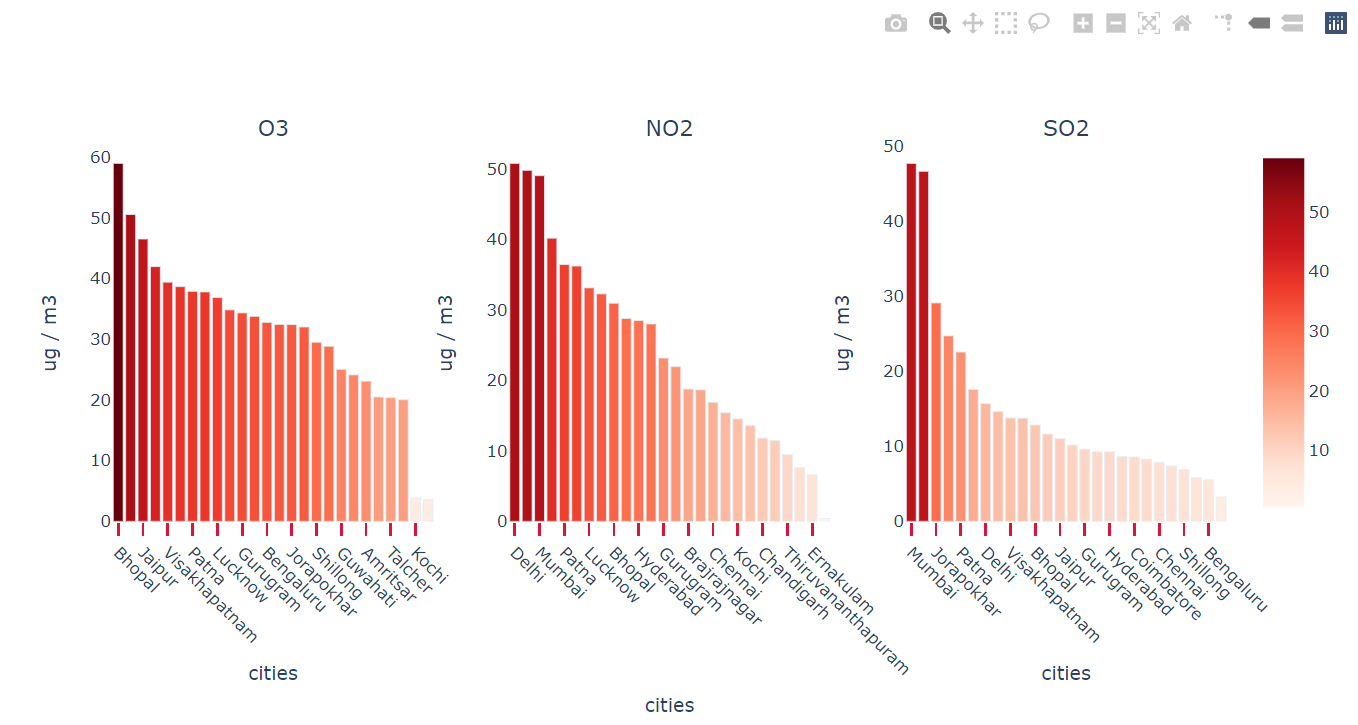

In [ ]:
x4= final_data[['NO','City']].groupby(["City"]).mean().sort_values(by='NO',ascending=False).reset_index()
x5 = final_data[['NH3','City']].groupby(["City"]).mean().sort_values(by='NH3',ascending=False).reset_index()
x6 = final_data[['NOx','City']].groupby(["City"]).mean().sort_values(by='NOx',ascending=False).reset_index()

fig = make_subplots(rows=1, cols=3, subplot_titles=("NO","NH3",'NOx'))

fig.add_trace(go.Bar( y=x4['NO'], x=x4["City"],  
                     marker=dict(color=x4['NO'], coloraxis="coloraxis")), 1, 1)


fig.add_trace(go.Bar( y=x5['NH3'], x=x5["City"],  
                     marker=dict(color=x5['NH3'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Bar( y=x6['NOx'], x=x6["City"],  
                     marker=dict(color=x6['NOx'], coloraxis="coloraxis")), 1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()

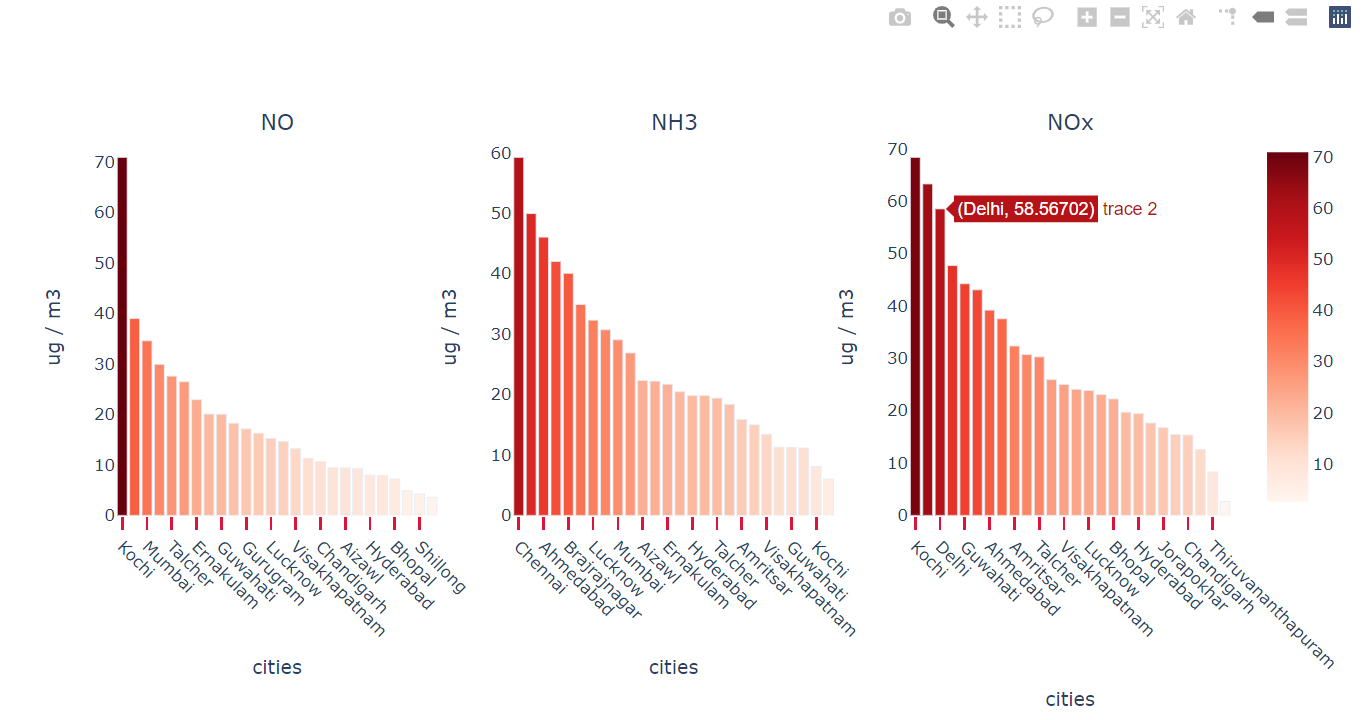

In [ ]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("PM2.5","PM10",'CO'))

x7 = final_data[['PM2.5','City']].groupby(["City"]).mean().sort_values(by='PM2.5',ascending=False).reset_index()
x8 = final_data[['PM10','City']].groupby(["City"]).mean().sort_values(by='PM10',ascending=False).reset_index()
x9 = final_data[['CO','City']].groupby(["City"]).mean().sort_values(by='CO',ascending=False).reset_index()

fig.add_trace(go.Bar( y=x7['PM2.5'], x=x7["City"],  
                     marker=dict(color=x7['PM2.5'], coloraxis="coloraxis")), 1, 1)


fig.add_trace(go.Bar( y=x8['PM10'], x=x8["City"],  
                     marker=dict(color=x8['PM10'], coloraxis="coloraxis")), 1, 2)

fig.add_trace(go.Bar( y=x9['CO'], x=x9["City"],  
                     marker=dict(color=x9['CO'], coloraxis="coloraxis")), 1, 3)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="cities")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.show()  

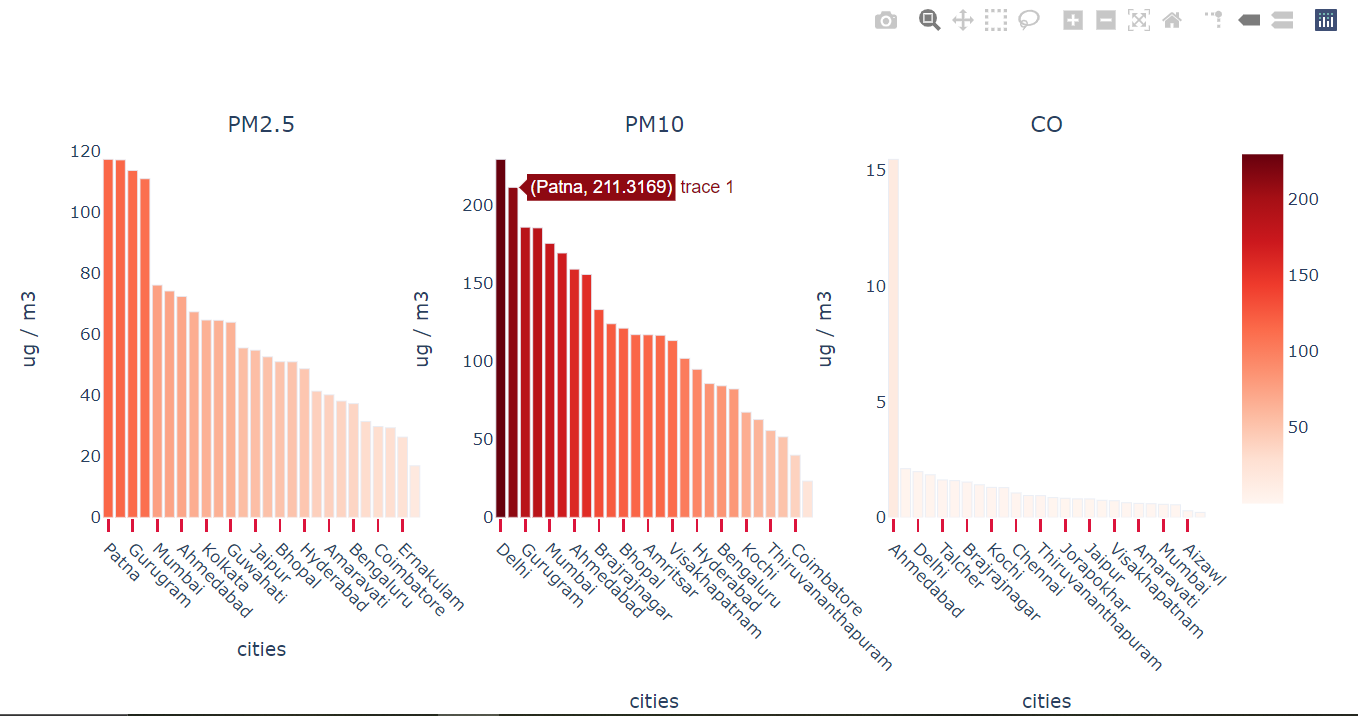

#### 9. barplot()

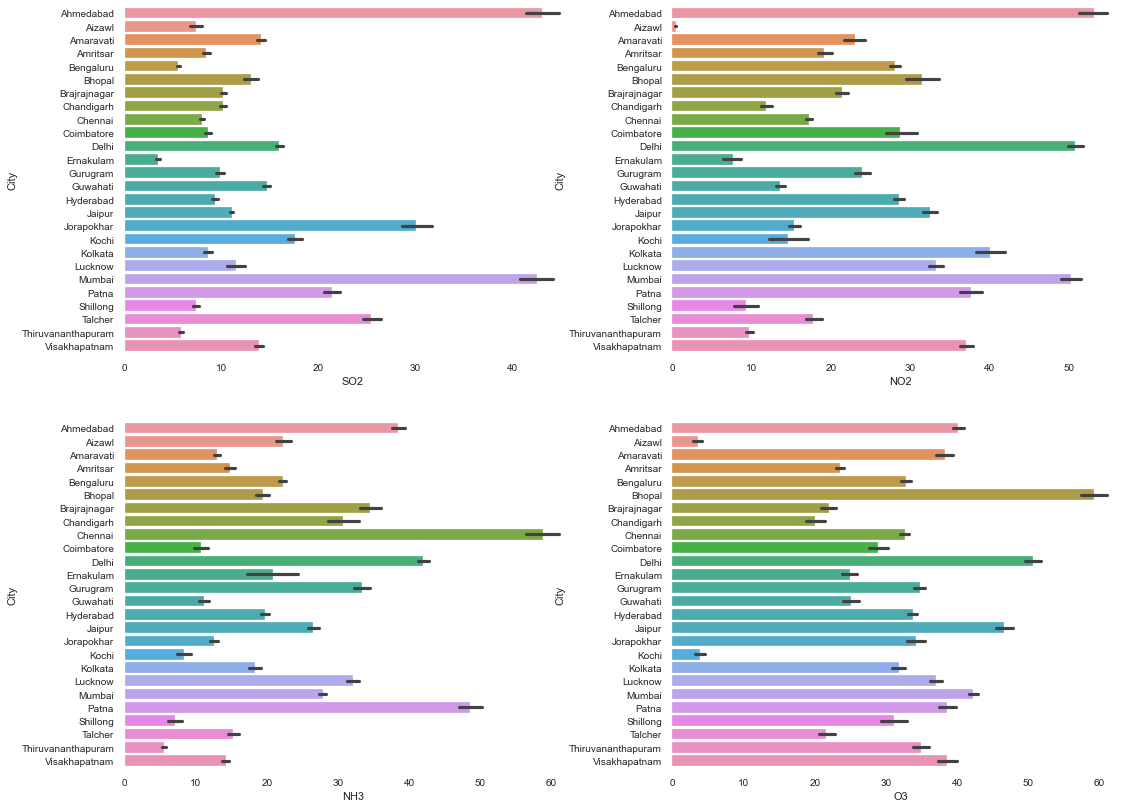

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("SO2", y="City",
                 data=final_data,
                 ax=axes[0,0]
                )
ax = sns.barplot("NO2", y="City",
                 data=final_data,
                 ax=axes[0,1]
                )
ax = sns.barplot("NH3", y="City",
                 data=final_data,
                 ax=axes[1,0]
                )
ax = sns.barplot("O3", y="City",
                 data=final_data,
                 ax=axes[1,1]
                )

#### 10. Visualising the Emmissions over the years, by grouping the dataset datewise and creating a new DataFrame for each of the listed pollutants.

In [45]:
datewise_emmissions_SO2=final_data.groupby('Date').mean()['SO2']
datewise_emmissions_NO2=final_data.groupby('Date').mean()['NO2']
datewise_emmissions_NH3=final_data.groupby('Date').mean()['NH3']
datewise_emmissions_O3=final_data.groupby('Date').mean()['O3']

<AxesSubplot:xlabel='Date'>

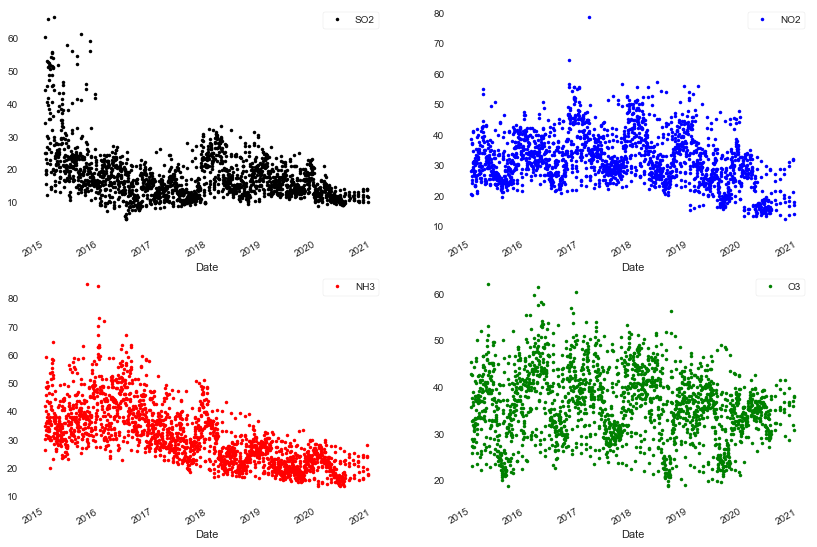

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
datewise_emmissions_SO2.plot(style='k.',legend=True,ax=axes[0,0])
datewise_emmissions_NO2.plot(style='b.',legend=True,ax=axes[0,1])
datewise_emmissions_NH3.plot(style='r.',legend=True,ax=axes[1,0])
datewise_emmissions_O3.plot(style='g.', legend=True,ax=axes[1,1])

Gases NO2 and O3 shows seasonality whereas NH3 shows a downward trend. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal. The analysis of air pollution in terms of seasonality can explicitly confirm the presence of elevated levels in winter months and during the heating season and low in summer months and during the summer season. Whereas trend analysis is an important tool for examining the changes in pollutant concentration over time.

#### 11. Grouping data year, month, week and day wise.

In [66]:
#Making the date column as the index of the dataframe to make plotting and visulaisation easier.
final_data1 = final_data.set_index('Date')
final_data1 = final_data1.drop(['index'], axis=1)
final_data1.head(10)

City     PM2.5      PM10        NO    NO2     NOx      NH3  \
Date                                                                          
2015-01-01  Ahmedabad  102.2769  185.3905    0.9200  18.22   17.15  16.0374   
2015-02-01  Ahmedabad  114.7119  200.9669    0.9700  15.69   16.46  13.1509   
2015-03-01  Ahmedabad   92.4707  195.2464   17.4000  19.30   29.70  19.0714   
2015-04-01  Ahmedabad   60.8964  117.1924    1.7000  18.48   17.97  11.5741   
2015-05-01  Ahmedabad   75.4552  185.8383   22.1000  21.42   37.76  27.0773   
2015-06-01  Ahmedabad  114.8980  242.1798   45.4100  38.48   81.50  38.5019   
2015-07-01  Ahmedabad  158.7319  322.1867  112.1600  40.62  130.77  84.8427   
2015-08-01  Ahmedabad  122.4198  282.2202   80.8700  36.74   96.75  38.6961   
2015-09-01  Ahmedabad  101.3947  189.3323   29.1600  31.00   48.00  33.0229   
2015-10-01  Ahmedabad  101.8845  139.8194    7.0277   7.04    0.00  18.4021   

                  CO    SO2      O3    BTX    AQI AQI_Bucket  
Date                                                          
2015-01-01    0.9200  27.64  133.36   0.02  240.0       Poor  
2015-02-01    0.9700  24.55   34.06  12.95  280.0       Poor  
2015-03-01   17.4000  29.07   30.70  25.45  300.0       Poor  
2015-04-01    1.7000  18.59   36.08  15.57  111.0   Moderate  
2015-05-01   22.1000  39.33   39.31  28.68  329.0  Very Poor  
2015-06-01   45.4100  45.76   46.51  18.18  465.0     Severe  
2015-07-01  112.1600  32.28   33.47   0.00  859.0     Severe  
2015-08-01   80.8700  38.54   31.89   0.00  671.0     Severe  
2015-09-01   29.1600  58.68   25.75   0.00  371.0  Very Poor  
2015-10-01    3.4785   8.29    4.55   0.00  237.0       Poor

In [64]:
yearly = final_data1.drop(['AQI'], axis = 1).resample('Y').mean()
monthly = final_data1.drop(['AQI'], axis = 1).resample('M').mean()
weekly = final_data1.drop(['AQI'], axis = 1).resample('W').mean()
daily = final_data1.drop(['AQI'], axis = 1).resample('D').mean()

<AxesSubplot:title={'center':'Daily Emmissions'}, xlabel='Date'>

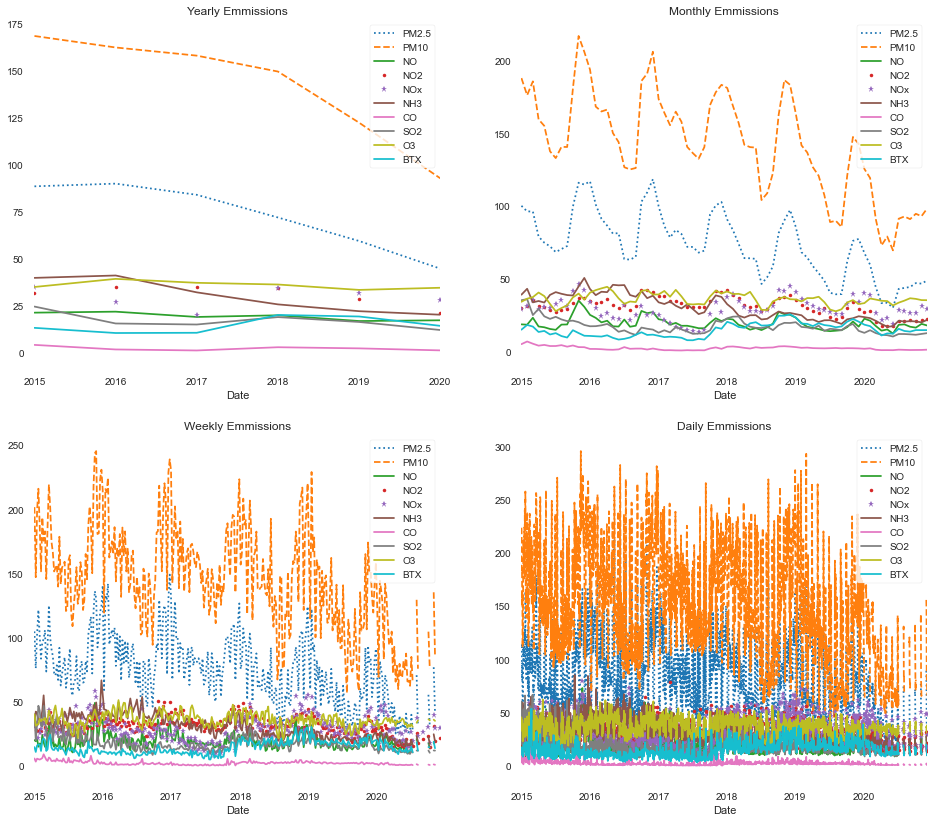

In [65]:
#All the above dataframes will be grouped together and plotted together in a single frame using subplots.

fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(16,14))
yearly.plot(style=[':', '--', '-','.','*'],
            ax=axes[0,0],
            title='Yearly Emmissions')

monthly.plot(style=[':', '--', '-','.','*'],
             ax=axes[0,1],
             title='Monthly Emmissions')

weekly.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,0],
            title='Weekly Emmissions')

daily.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,1],
            title='Daily Emmissions')

We can see a drop in gases towards the end 2019 and in 2020. This could be the effect of lockdown due to covid-19. Comparing all 4 emmissions, PM10 has the highest concentration and CO being the least.

#### 12. Boxplot -  to understand the data distribution, outliers and median values

<AxesSubplot:title={'center':'Daily Emmissions Distribution'}>

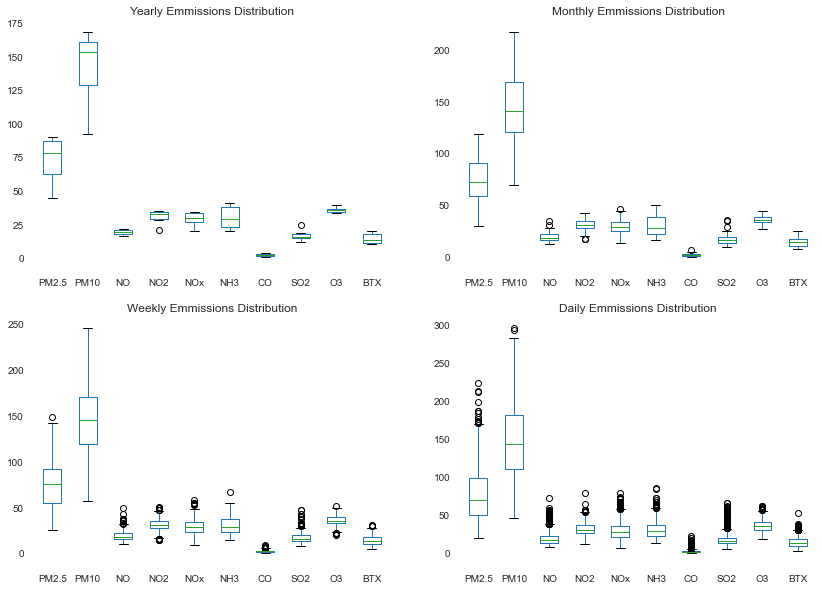

In [67]:
#Putting together all the emissions data, datewise and visualising the data distributions, outliers and median values

fig,axes2=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot.box(
                ax=axes2[0,0],
                title='Yearly Emmissions Distribution')

monthly.plot.box(
                ax=axes2[0,1],
                title='Monthly Emmissions Distribution')

weekly.plot.box(
                ax=axes2[1,0],
                title='Weekly Emmissions Distribution')

daily.plot.box(
                ax=axes2[1,1],
                title='Daily Emmissions Distribution')

The number of outliers are less in yearly emmission compared to monthly, weekly and daily emmissions.

#### 12. Visualizing yearly data

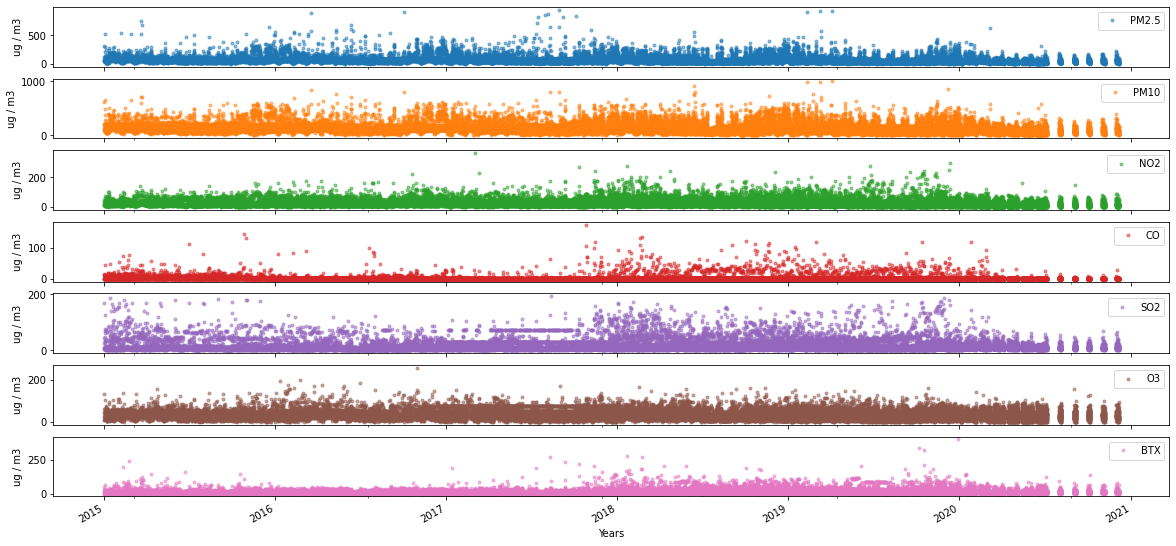

In [136]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']
final_data.set_index('Date',inplace=True)
axes = final_data[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 10), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.
CO level has started increasing after 2017. The same pattern is also reflected in BTX levels also.

### Conclusion
* It is interesting to note that the Polluiton level in India generally drops down as summer approaches. This can also be evaluated by the graphs above.
* However, the reduction in march 2020 is more pronounced as compared to march 2019. The major contribution lockdown has done to the environmental pollutional is clearly evident through the graphs. The low use of motor vehicles, non functioning of industries, schools, offices shutdown, etc have majorly contributed to the cleaning of the environment.

In India major pollution causing factors are transportation, industries, garbage dumping and most importantly lack of awarness amongst people. As the transmission of novel corona virus increases rapidly, the whole world adopted the curfew activity with restriction of human mobility. The imposition of quarantine stopped all the commercial activity that greatly affects the various important environmental parameters which directly connected to human health. As all the types of social, economic, industrial and urbanization activity suddenly shut off, nature takes the advantages and showed improvement in the quality of air, cleaner rivers, less noise pollution, undisturbed and calm wildlife. It not only restricted the spread of infection rate, but also has given a scope to realize the restoration ability of environment and health with reduced ambient air pollutants levels leading to improved air quality.

But, talking about the post lockdown situation, the virus has spread drastically that using public vehicles have become a threat in many places. In such scenario, people start buying own vehicles. This in return will cause more pollution compared to pre-lockdown or lockdown time.